In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

In [2]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

In [3]:
from models.image import Image

<class 'numpy.ndarray'>


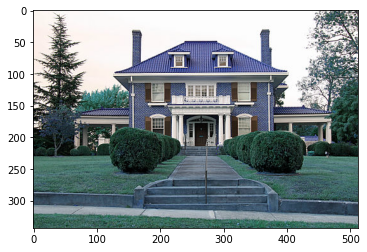

In [128]:
#image = Image()
image = cv2.imread('../data/images/house.jpg')
print(type(image))
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imshow(gray, "gray")

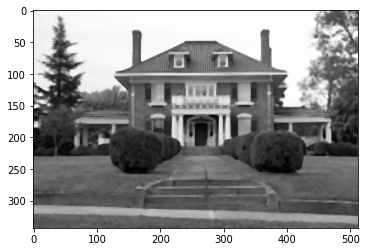

In [22]:
# import your func
# from modules.thresholding import threshHandler
# from modules.histogramManipulation import histogramManipulationHandler
# from modules.sharpening import sharpenHandler 
# from modules.otsuThresholding import OstuThresholdingHandler
# from modules.AdaptiveThresholding import adaptiveThresholdingHandler
# from modules.averageBlur import averageBlurringHandler
# from modules.bilateralBlur import bilateralBlurringHandler
# from modules.gaussianBlur import gaussianBlurringHandler
# from modules.cornerDetection import cornerDetectionHandler

def medianAdaptiveImageBinarizer(image: np.array, thresh_value: float) -> np.array:
    """Binarize the image

    Args:
        image (np.array): image to change
        thresh_value (float): Threshold Value to choose

    Returns:
        np.array: binarized image
    """

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    medianGray = cv2.medianBlur(gray, 5)

    retImg = cv2.adaptiveThreshold(medianGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, thresh_value)
    retImg = np.stack((retImg, ) * 3, axis = -1)
    return medianGray
    #return cv2.cvtColor(medianGray, cv2.COLOR_GRAY2BGR)

# imshow(threshHandler(image, {'threshold_value': 150}).img, cmap='gray')
# imshow(histogramManipulationHandler(image, {'contrast_limit': 1}).img, cmap='gray')
# imshow(OstuThresholdingHandler(image, {}).img, cmap='gray')
plt.imshow(medianAdaptiveImageBinarizer(image, {'threshold_value': 0.75}), cmap='gray')
# imshow(sharpenHandler(image, {'kernel_size': 7, 'strength': 0}).img, cmap='gray')
# imshow(averageBlurringHandler(image, {'Blur amount': 5}).img, cmap='gray')
# imshow(bilateralBlurringHandler(image, {}).img, cmap='gray')
# imshow(gaussianBlurringHandler(image, {'sigmaX': 1, 'sigmaY': 0}).img, cmap='gray')
# imshow(cornerDetectionHandler(image, {'kernel_size': 5, 'sharpen_strength': 1}).img, cmap='gray')
#imshow(cv2.GaussianBlur(image.img, (5, 5), 0.1, 0.1))

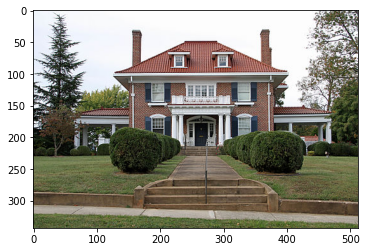

In [9]:

def gamma_function(channel, gamma):
    invGamma = 1/gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8") #creating lookup table
    channel = cv2.LUT(channel, table)
    return channel

img = cv2.imread("../data/images/house.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
original = img.copy()
img[:, :, 0] = gamma_function(img[:, :, 0], 0.75) # down scaling blue channel
img[:, :, 2] = gamma_function(img[:, :, 2], 1.25) # up scaling red channel
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:, :, 1] = gamma_function(hsv[:, :, 1], 1.2) # up scaling saturation channel
img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# cv2.imshow('Original', original)
# cv2.imshow('Summer', img)
plt.imshow(img)

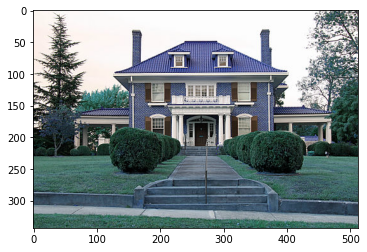

In [10]:
img = cv2.imread("../data/images/house.jpg")
plt.imshow(img)

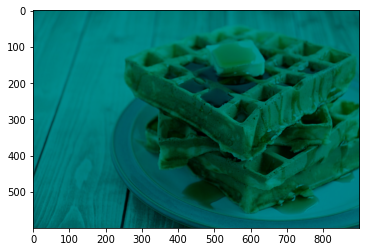

In [93]:
import cv2

def exponential_function(channel, exp):
    table = np.array([min((i**exp), 255) for i in np.arange(0, 256)]).astype("uint8") # creating table for exponent
    channel = cv2.LUT(channel, table)
    return channel
def tone(img, number):
    for i in range(3):
        if i == number:
            img[:, :, i] = exponential_function(img[:, :, i], 1.05) # applying exponential function on slice
        else:
            img[:, :, i] = 0 # setting values of all other slices to 0
    return img
img = cv2.imread("../data/images/waffle.jpg")
img = cv2.cvtColor(imif bottom_right is True:
                retImg[i, j] = max(retImg[i, j], output_br[i, j])g, cv2.COLOR_BGR2RGB)
original = img.copy()
# img = tone(img, 1) # change second parameter to 0 for blue, 1 for green and 2 for red screen
img[:, :, 0] = 0
img[:, :, 2] = exponential_function(img[:, :, 2], 0.9)
img[:, :, 1] = exponential_function(img[:, :, 1], 0.9)
plt.imshow(img)

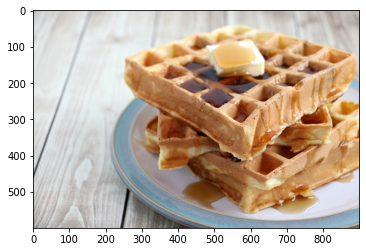

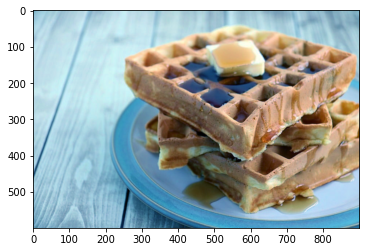

In [133]:
import cv2
import numpy as np


def winterHandler(image: np.array, params: dict) -> np.array:
    """winter filter handler

    Args:
        image(np.array): image to change
        params (dict): params has { winter_value } range: (0, 1) step size of 0.01

    Returns:
        np.array: Image having a winter filter
    """

    if 'winter_value' not in params:
        return image

    if params['winter_value'] >= 1:
        params['winter_value'] = 0.99
    elif params['winter_value'] < 0:
        params['winter_value'] = 0

    new_img = winterFilter(
        image, float(params['winter_value']))
    return new_img


def winterFilter(image: np.array, winter_value: float) -> np.array:
    """Apply winter filter on the image

    Args:
        image (np.array): image to change
        winter_value (float): How much gamma function's power should be taken

    Returns:
        np.array: winter filter applied image
    """
    image[:, :, 2] = gamma_function(image[:, :, 2], 1 - winter_value)
    image[:, :, 0] = gamma_function(image[:, :, 0], 1 + winter_value)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 1] = gamma_function(hsv[:, :, 1], 1 + (4 / 5 * winter_value))

    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


def gamma_function(channel: np.array, gamma: float) -> np.array:
    table = np.array([((i / 255) ** (1/gamma)) *
                      255 for i in np.arange(0, 256)]).astype("uint8")
    channel = cv2.LUT(channel, table)
    return channel

img = cv2.imread("../data/images/waffle.jpg")
plt.imshow(cv2.cvtColor(winterHandler(img, {'winter_value': 0.4}), cv2.COLOR_BGR2RGB))

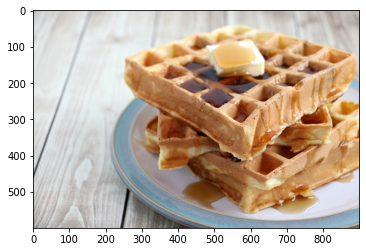

In [123]:
plt.imshow(cv2.cvtColor(cv2.imread("../data/images/waffle.jpg"), cv2.COLOR_BGR2RGB))

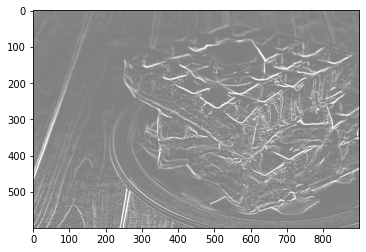

In [146]:
import cv2
import numpy as np


def embossHandler(image: np.array, params: dict) -> np.array:
    """Emboss Filter Handler

    Args:
        image(np.array): image to change
        params (dict): params has { bottom_left: bool, bottom_right: bool, top_left:bool, top_right:bool }

    Returns:
        np.array: Image with emboss filter on it
    """

    if params['bottom_left'] is False and params['bottom_right'] is False and params['top_left'] is False and params['top_right'] is False:
        return image

    new_img = emboss(
        image, params['bottom_left'], params['bottom_right'], params['top_left'], params['top_right'])
    return new_img


def emboss(image: np.array, bottom_left: bool, bottom_right: bool, top_left: bool, top_right: bool) -> np.array:
    """Embosses the image

    Args:
        image (np.array): image to change
        bottom_left(bool): emboss from bottom left
        bottom_right(bool): emboss from bottom right
        top_left(bool): emboss from top left
        top_right(bool): emboss from top right

    Returns:
        np.array: Embossed image
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = image.shape[:2]
    base = np.ones((height, width), np.uint8) * 128
    retImg = np.zeros((height, width), np.uint8)
    output_bl = np.zeros((height, width), np.uint8)
    output_br = np.zeros((height, width), np.uint8)
    output_tr = np.zeros((height, width), np.uint8)
    output_tl = np.zeros((height, width), np.uint8)
    if bottom_left is True:
        kernel_bl = np.array([[0, -1, -1],
                              [1, 0, -1],
                              [1, 1, 0]])
        output_bl = cv2.add(cv2.filter2D(gray, -1, kernel_bl), base)
    if bottom_right is True:
        kernel_br = np.array([[-1, -1, 0],
                              [-1, 0, 1],
                              [0, 1, 1]])
        output_br = cv2.add(cv2.filter2D(gray, -1, kernel_br), base)
    if top_left is True:
        kernel_tl = np.array([[1, 1, 0],
                              [1, 0, -1],
                              [0, -1, -1]])
        output_tl = cv2.add(cv2.filter2D(gray, -1, kernel_tl), base)
    if top_right is True:
        kernel_tr = np.array([[0, 1, 1],
                              [-1, 0, 1],
                              [-1, -1, 0]])
        output_tr = cv2.add(cv2.filter2D(gray, -1, kernel_tr), base)
    retImg = np.maximum(output_bl, np.maximum(
        output_br, np.maximum(output_tl, output_tr)))
    retImg = cv2.cvtColor(retImg, cv2.COLOR_GRAY2BGR)
    return retImg
                        
img = cv2.imread("../data/images/waffle.jpg")
plt.imshow(cv2.cvtColor(embossHandler(img, {'bottom_left': True, 'bottom_right': True, 'top_left': False, 'top_right': False}), cv2.COLOR_BGR2RGB))